In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
ls  data/

crime_astros_final.csv*  crime_ru_final.csv*      crime_uh_final.csv*
crime_dynamo_final.csv*  crime_texans_final.csv*


In [4]:
path ='data/crime_dynamo_final.csv'

In [5]:
df = pd.read_csv(path)
df=df.rename(columns = {'Unnamed: 0':'date',
                       'Hour':'hour'})
df.hour = df.hour.astype(int)
df.day = df.day.astype(int)
df.year = df.year.astype(int)
df.date = pd.to_datetime(df.date)  # datetime index
#df = df.set_index('date').sort_index(ascending=True)
df['game_on'] = np.where(df.game =='No Game',0,1)
df.drop(['game'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23939 entries, 0 to 23938
Data columns (total 15 columns):
date            23939 non-null datetime64[ns]
Beat            23939 non-null object
OffenseType     23939 non-null object
Premise         23939 non-null object
NumOffenses     23939 non-null float64
hour            23939 non-null int64
day             23939 non-null int64
weekday         23939 non-null object
month           23939 non-null object
year            23939 non-null int64
lat             23939 non-null float64
lon             23939 non-null float64
add             23939 non-null object
dist_stadium    23939 non-null float64
game_on         23939 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 2.7+ MB


In [6]:
df.head(2)

,date,Beat,OffenseType,Premise,NumOffenses,hour,day,weekday,month,year,lat,lon,add,dist_stadium,game_on
0,2010-01-01,1A10,Auto Theft,bar/night club parking lot,1.0,0,1,Friday,Jan,2010,29.757212,-95.353294,"350 Hamilton St, Houston, TX 77002, USA",0.349360,0
1,2010-01-01,1A10,Theft,bar/night club,1.0,0,1,Friday,Jan,2010,29.753512,-95.363811,"1250 Caroline St, Houston, TX 77002, USA",0.691728,0


## Trim df

In [7]:
print(list(df.columns))

['date', 'Beat', 'OffenseType', 'Premise', 'NumOffenses', 'hour', 'day', 'weekday', 'month', 'year', 'lat', 'lon', 'add', 'dist_stadium', 'game_on']


In [8]:
#df= df[[ 'OffenseType', 'hour', 'weekday', 'dist_stadium', 'game_on']]
df = df[[ 'OffenseType', 'hour', 'weekday', 'dist_stadium', 'game_on']]

In [9]:
df.head()

,OffenseType,hour,weekday,dist_stadium,game_on
0,Auto Theft,0,Friday,0.349360,0
1,Theft,0,Friday,0.691728,0
2,Burglary,0,Friday,0.838203,0
3,Theft,0,Friday,0.947449,0
4,Theft,0,Friday,0.407752,0


In [10]:
df.describe()

,hour,dist_stadium,game_on
count,23939.000000,23939.000000,23939.000000
mean,12.848323,1.889909,0.055516
std,6.721773,35.166151,0.228990
min,0.000000,0.059523,0.000000
25%,8.000000,0.567545,0.000000
50%,13.000000,0.830427,0.000000
75%,18.000000,1.080726,0.000000
max,23.000000,4859.196349,1.000000


## TEST1

In [11]:
one_mile =  df.dist_stadium <= 3.0
df = df[one_mile]

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


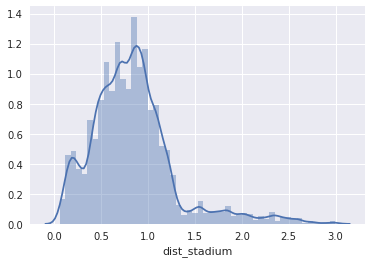

In [12]:

# find distribution of target column / trying to predict
sns.distplot(df['dist_stadium'])

In [13]:
df.corr()

,hour,dist_stadium,game_on
hour,1.000000,-0.023146,0.001818
dist_stadium,-0.023146,1.000000,-0.023812
game_on,0.001818,-0.023812,1.000000


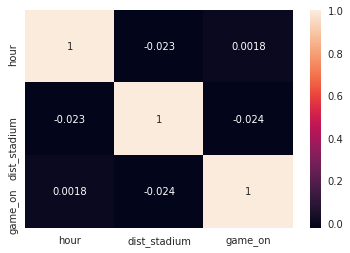

In [14]:

sns.heatmap(df.corr(),annot=True)

## Get dummies

In [15]:
pd.get_dummies?

In [16]:
dfdm = pd.get_dummies(df, drop_first=True)

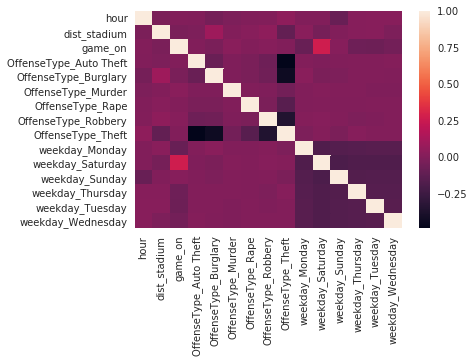

In [17]:
sns.heatmap(dfdm.corr(),annot=False)

In [18]:
dfdm.head()

,hour,dist_stadium,game_on,OffenseType_Auto Theft,OffenseType_Burglary,OffenseType_Murder,OffenseType_Rape,OffenseType_Robbery,OffenseType_Theft,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0.349360,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.691728,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0.838203,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.947449,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.407752,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
df.head()

,OffenseType,hour,weekday,dist_stadium,game_on
0,Auto Theft,0,Friday,0.349360,0
1,Theft,0,Friday,0.691728,0
2,Burglary,0,Friday,0.838203,0
3,Theft,0,Friday,0.947449,0
4,Theft,0,Friday,0.407752,0


## Pairplot

In [ ]:
#sns.pairplot(dfdm)

In [ ]:
#dfdm.drop(['dist_stadium'],axis=1)
#dfdm['game_on']

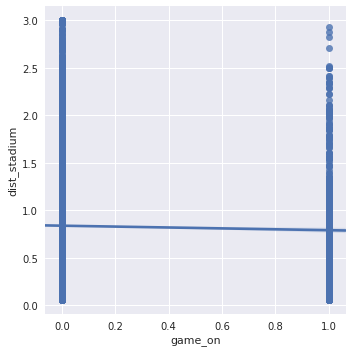

In [20]:
sns.lmplot(x='game_on',y='dist_stadium', data=dfdm)

In [21]:
from sklearn.cross_validation import train_test_split

X = dfdm.drop(['hour'],axis=1)

y = dfdm['hour']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.3,
                                random_state=42)

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# train model

In [22]:
from sklearn.linear_model import LinearRegression

# create a linear regression object
model =  LinearRegression()


# train fit model
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evalueate model

In [23]:
print(model.intercept_)
print(model.coef_)

12.96249149470526
[-2.77655893e-01  1.61273316e-03  8.53954175e-01 -3.43622133e-01
 -3.82985575e+00  4.04424609e-01  5.50215684e-01  8.66813180e-01
 -7.11865859e-01 -5.44384523e-01 -1.85913127e+00 -3.60448461e-01
 -1.89348930e-01 -1.67487293e-01]


## Create a dataframe from coeff

In [24]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
dist_stadium,-0.277656
game_on,0.001613
OffenseType_Auto Theft,0.853954
OffenseType_Burglary,-0.343622
OffenseType_Murder,-3.829856
OffenseType_Rape,0.404425
OffenseType_Robbery,0.550216
OffenseType_Theft,0.866813
weekday_Monday,-0.711866
weekday_Saturday,-0.544385


## Predictions from our test

In [25]:
predictions = model.predict(X_test)

## Pefrorm scatteplot                                

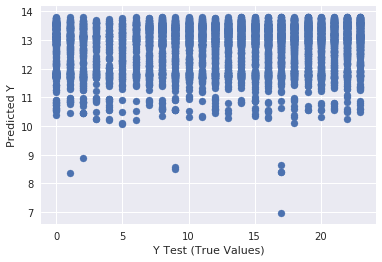

In [26]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Y')
plt.show()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


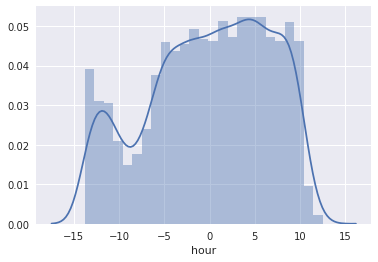

In [27]:
# histogram of the residuals
sns.distplot((y_test - predictions),bins='auto')

## Calculate metrics

In [28]:
from sklearn import metrics

## MAE
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
- mean of the absolute error
- take your error and take the absolute value of it and average it out.

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 5.651208279234135


# MSE

**Mean Squared Error** (MSE) is the mean of the squared errors:

- mean of the squared errors
- popular b/c it punish larger errors
- more usefull in the real world  because it takes into account larger b/c its square them.


$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [31]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 45.21206188133109


In [32]:
def MSE(yHat, y):
    return np.sum((yHat - y)**2) / y.size

MSE(y_test,predictions)

45.21206188133109

# RMSE
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [33]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 6.7239915140734


## RSQ


In [34]:
print('RSQ:', metrics.explained_variance_score(y_test, predictions))

RSQ: 0.014631893680896457


In [35]:
params = pd.Series(model.coef_, index=X.columns)
params

dist_stadium             -0.277656
game_on                   0.001613
OffenseType_Auto Theft    0.853954
OffenseType_Burglary     -0.343622
OffenseType_Murder       -3.829856
OffenseType_Rape          0.404425
OffenseType_Robbery       0.550216
OffenseType_Theft         0.866813
weekday_Monday           -0.711866
weekday_Saturday         -0.544385
weekday_Sunday           -1.859131
weekday_Thursday         -0.360448
weekday_Tuesday          -0.189349
weekday_Wednesday        -0.167487
dtype: float64

In [36]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [37]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                        effect  error
dist_stadium              -0.0    0.0
game_on                    0.0    0.0
OffenseType_Auto Theft     1.0    0.0
OffenseType_Burglary      -0.0    0.0
OffenseType_Murder        -4.0    1.0
OffenseType_Rape           0.0    1.0
OffenseType_Robbery        1.0    0.0
OffenseType_Theft          1.0    0.0
weekday_Monday            -1.0    0.0
weekday_Saturday          -1.0    0.0
weekday_Sunday            -2.0    0.0
weekday_Thursday          -0.0    0.0
weekday_Tuesday           -0.0    0.0
weekday_Wednesday         -0.0    0.0
